<h2>Inhaltverzeichnis</h2>
    <ol>
        <li><a href="#Pseudo-Plot-Color">Pseudo Plot Color</a>
        <ol>
            <li><a  href="#House-Price">House Price</a>
                <ol>
                    <li><a  href="#Daten-erstellen">Daten erstellen</a></li>
                    <li><a  href="#Daten-gruppieren">Daten gruppieren</a></li>
                    <li><a  href="#Daten-pivotieren">Daten pivotieren</a></li>
                    <li><a  href="#Heatmap-erstellen">Heatmap erstellen</a></li>
                </ol>
            </li>
            <li><a  href="#Body-Height">Body Height</a>
                <ol>
                    <li><a  href="#Daten-Erstellung">Daten Erstellung</a></li>
                    <li><a  href="#Daten-Gruppierung">Daten Gruppierung</a></li>
                    <li><a  href="#Daten-Erstellung">Daten Provitierung</a></li>
                    <li><a  href="#Heatmap-Erstellung">Heatmap Erstellung</a></li>
                </ol>
            </li>
        </ol>
        </li>
    </ol>

Heatmaps sind wie farbige Karten für Daten. Sie helfen uns, Muster oder Trends in Zahlen schnell zu erkennen. Zum Beispiel könnten wir eine Heatmap verwenden, um zu zeigen, wie die Temperatur in verschiedenen Regionen variiert. Anhand der Farben können wir sehen, wo es heißer oder kälter ist, oder die Preise der Häuser leicht erkennen, was die billigsten und teuersten Häuser sind. Diese Art der Darstellung macht es einfach, komplexe Daten zu verstehen, ohne dass man ein Datenexperte sein muss.

# Pseudo Plot Color

## House Price

### Daten erstellen

In [1]:
data = {
    'Location': ['City','Suburb', 'City', 'City', 'Village', 'Suburb', 'Village', 'Village', 'Suburb', 'City'],
    'Type': ['Apartment', 'Apartment', 'House', 'Apartment', 'House', 'House', 'Apartment', 'House', 'Apartment', 'House'],
    'Price': [500000, 550000, 950000, 750000, 800000, 850000, 900000, 550000, 1000000, 1200000]
}

In [2]:
import pandas as pd
df = pd.DataFrame(data)

In [3]:
df.head()

,Location,Type,Price
0,City,Apartment,500000
1,Suburb,Apartment,550000
2,City,House,950000
3,City,Apartment,750000
4,Village,House,800000


### Daten gruppieren

In [4]:
df_grouped = df.groupby(['Location','Type'])['Price'].mean().reset_index()
df_grouped

,Location,Type,Price
0,City,Apartment,625000.0
1,City,House,1075000.0
2,Suburb,Apartment,775000.0
3,Suburb,House,850000.0
4,Village,Apartment,900000.0
5,Village,House,675000.0


### Daten pivotieren

In [5]:
house_price_piv_tab = df_grouped.pivot(index ='Location',columns='Type',values='Price')
house_price_piv_tab

Type,Apartment,House
Location,,
City,625000.0,1075000.0
Suburb,775000.0,850000.0
Village,900000.0,675000.0


### Heatmap erstellen

In [6]:
# plot target variable against multiple variables

In [7]:
def heat_map(pivot_table, title):
    import matplotlib.pyplot as plt
    import numpy as np

    # Mithelfe von pcolormesh-Funktion erstellen wir das Heatmap-Diagramm 
    heatmap = plt.pcolormesh(pivot_table, cmap='magma') # 'magma' hier verwenden wir ein Colormap von intensiven bis zur warmen Farben 

    # Farbskala hinzufügen
    cbar = plt.colorbar(heatmap)

    #um welche Informationen an welcher Stelle stehen zu verstehen brauchen wir eine Achsenbeschriftungen

    #Durch yticks() beschriften wir die Y-Achse. Der erste Parameter gibt die Positionen auf der Y-Achse an (vertikal), und der zweite Parameter sind die Indexwerte aus der Tabelle.

    plt.yticks(np.arange(0,len(pivot_table.index))+0.5, pivot_table.index) # + 0.5 wird hinzugefügt, um die Position in der Mitte jedes Balkens zu platzieren.
    plt.xticks(np.arange(0,len(pivot_table.columns))+0.5, pivot_table.columns, rotation=40) #Wir machen das Gleiche für die X-Achse, drehen die Beschriftungen um 40 Grad und richten sie rechtsbündig aus.
    plt.title(title)
    plt.show()


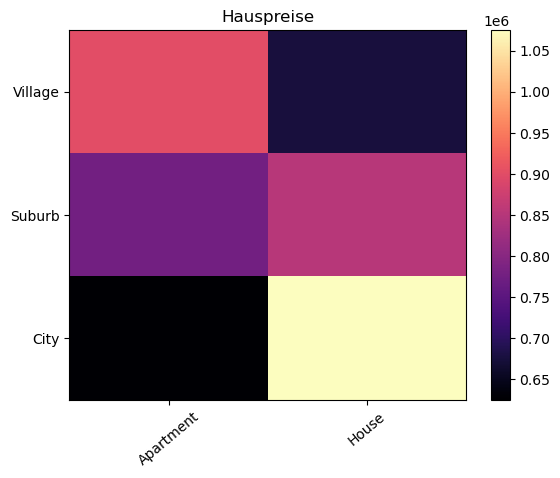

In [8]:
heat_map(house_price_piv_tab, 'Hauspreise')

## Body Height

### Daten Erstellung

In [9]:
import pandas as pd
import numpy as np

# Zufällige Beispieldaten erstellen
np.random.seed(42)

countries = ['USA', 'Germany', 'Japan','Algeria','Yemen']
genders = ['Male', 'Female']
data = {'Country': np.random.choice(countries, 100),
        'Gender': np.random.choice(genders, 100),
        'Height': np.random.normal(loc=170, scale=10, size=100).astype(int)}

df_2 = pd.DataFrame(data)

In [10]:
df_2.head()

,Country,Gender,Height
0,Algeria,Female,156
1,Yemen,Male,199
2,Japan,Male,159
3,Yemen,Female,179
4,Yemen,Female,163


### Daten Gruppierung

In [11]:
df_2_grouped = df_2.groupby(['Country','Gender'])['Height'].mean().round(0).reset_index()

### Daten Povitierung

In [12]:
height_pvt_tab = df_2_grouped.pivot(index='Country', columns='Gender',values='Height')
height_pvt_tab

Gender,Female,Male
Country,,
Algeria,168.0,170.0
Germany,172.0,172.0
Japan,164.0,172.0
USA,173.0,165.0
Yemen,171.0,173.0


### Heatmap Erstellung

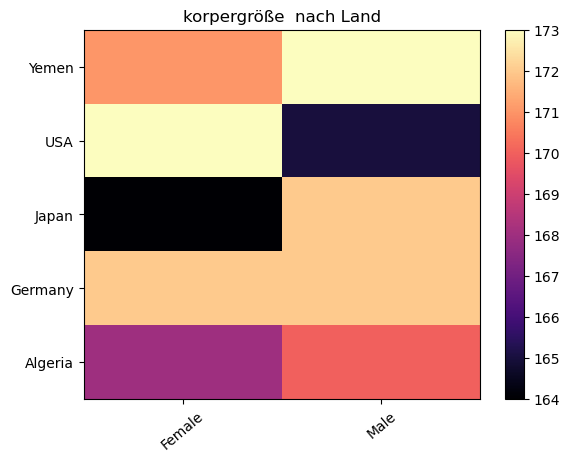

In [15]:
heat_map(height_pvt_tab,'korpergröße  nach Land')